## Домашнее задание по теории вероятностей.  
Выполнила: Курочкина Марина. Группа: БЭК 151.

In [2]:
import numpy as np # математика: косинусы и прочие
import pandas as pd # обработка данных
import seaborn as sns # графики
import matplotlib.pyplot as plt
import scipy.stats as stats
from pandas import date_range,Series,DataFrame,read_csv, qcut
%matplotlib inline

Задание 1.
Данные были взяты из америаканского исследования, посвященного уровню зарплаты среди мужского и женского населения. В таблице приведены данные по количеству мужчин(в тысячах), по количеству женщин, их должностях и средней зарплате на данных должностях.

In [3]:
student = pd.read_csv('/Users/DELL/Documents/inc_occ_gender2.csv')

In [4]:
student.head(6)

,Occupation,All_workers,All_weekly,Male_workers,Male_weekly,Female_workers,Female_weekly
0,Chief executives,1046,2041,763,2251,283,1836
1,General and operations managers,823,1260,621,1347,202,1002
2,Marketing and sales managers,948,1462,570,1603,378,1258
3,Administrative services managers,170,1191,96,1451,73,981
4,Computer and information systems managers,636,1728,466,1817,169,1563
5,Financial managers,1124,1408,551,1732,573,1130


C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


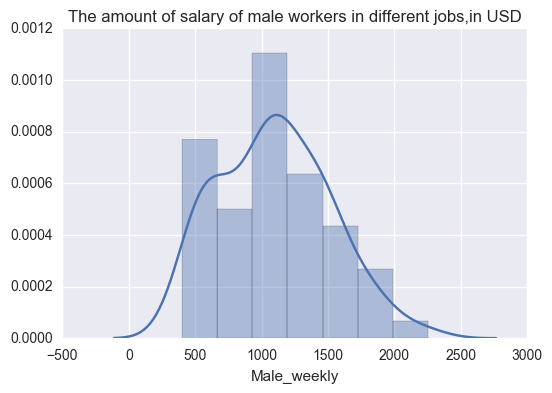

In [37]:
#plt.figure(figsize=(5, 3))
sns.distplot(student['Male_weekly'])
plt.title('The amount of salary of male workers in different jobs,in USD')

Гистограмма показывает распределение средних зарплат мужчин (за неделю), имеющих разные типы профессий. Измеряется в долларах.

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


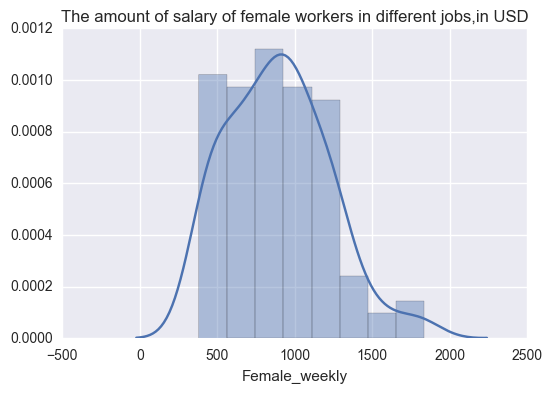

In [36]:
#plt.figure(figsize=(5, 3))
sns.distplot(student['Female_weekly'])
plt.title('The amount of salary of female workers in different jobs,in USD')

Гистограмма показывает распределение средних зарплат(за неделю) у женщин разных профессий. Измеряется в долларах.

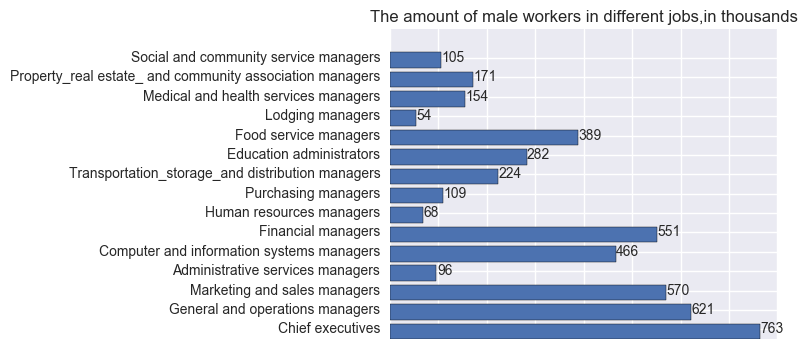

In [35]:
m=student.head(15)['Male_workers']
l=list(m)
c=list(student.head(15)['Occupation'])
grad = DataFrame({'Occupation': c, 'Male_workers' : l})
plt.figure(figsize=(5, 4))
pos = np.arange(len(l))
plt.barh(pos, l)

for p, c, ch in zip(pos, c, l):
    plt.annotate(str(ch), xy=(ch + 1, p + .5), va='center')
    
ticks = plt.yticks(pos+0.5, student.head(15)['Occupation'])
xt = plt.xticks()[0]
plt.xticks(xt, [' '] * len(xt))
plt.title('The amount of male workers in different jobs,in thousands')


Количество мужчин каждой профессии. Диаграмма отражает, какая из работ пользуется большей популярностью среди работающих мужчин.

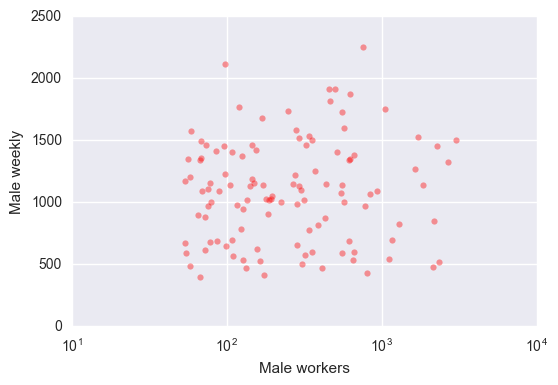

In [34]:
#plt.figure(figsize=(3, 3))
plt.scatter(student['Male_workers'], student['Male_weekly'], lw=0, alpha=.4, color='r')

plt.xlabel("Male workers")
plt.ylabel("Male weekly")
plt.xscale('log')

График показывает соотношение зарплат и количества людей, имеющих данную работу с данной зарплатой. По идее мог бы показывать взаимосвязь уровня зарплаты и людей, которые хотят эту работу. Но здесь нет определенного тренда.

([<matplotlib.axis.XTick at 0xc36d26a470>,
 <a list of 13 Text xticklabel objects>)

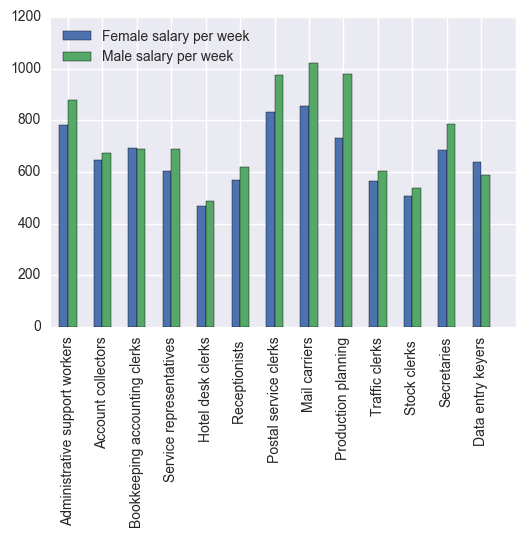

In [9]:
#df2 = DataFrame(15, columns=[student['Male_weekly']])
m=student.tail(13)['Male_weekly']
l=list(m)
c=list(student.tail(13)['Female_weekly'])
plt.figure(figsize=(2, 2))
df2 = DataFrame({'Female salary per week': c, 'Male salary per week' : l})
n=len(m)
df2.plot(kind='bar')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13], student.tail(13)['Occupation'])

Диаграмма показывает соотношение зарплат мужчин и женщин за неделю в разных профессиях. Видно, что мужчины во всех случаях в среднем зарабатывают больше женщин.

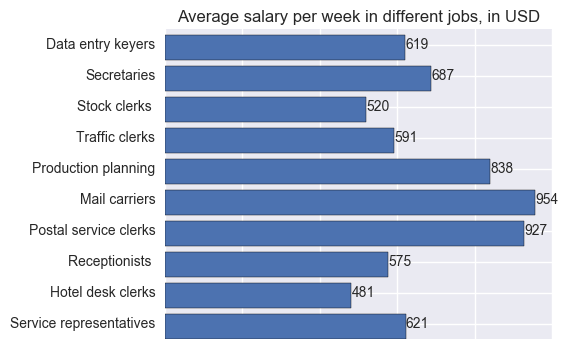

In [33]:
m=student.tail(10)['All_weekly']
l=list(m)
c=list(student.tail(10)['Occupation'])
grad = DataFrame({'Occupation': c, 'All_weekly' : l})
plt.figure(figsize=(5,4))
pos = np.arange(len(l))
plt.barh(pos, l)

for p, c, ch in zip(pos, c, l):
    plt.annotate(str(ch), xy=(ch + 1, p + .5), va='center')
    
ticks = plt.yticks(pos+0.5, student.tail(10)['Occupation'])
xt = plt.xticks()[0]
plt.xticks(xt, [' '] * len(xt))
plt.title('Average salary per week in different jobs, in USD')

Диаграмма показывает средний уровень зарплат на разных профессиях.

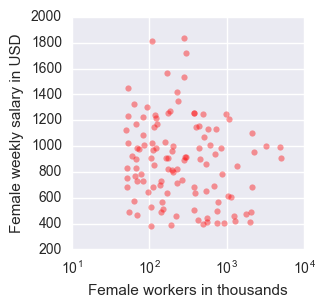

In [11]:
plt.figure(figsize=(3, 3))
plt.scatter(student['Female_workers'], student['Female_weekly'], lw=0, alpha=.4, color='r')
plt.xlabel("Female workers in thousands")
plt.ylabel("Female weekly salary in USD")
plt.xscale('log')

Показывает соотношение количества женщин на определенных работах и уровня зарплат, предлагаемого на этих работах. 

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


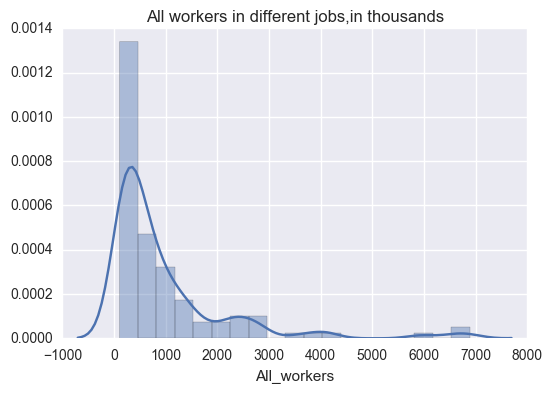

In [28]:
#plt.figure(figsize=(7, 2.5))
sns.distplot(student['All_workers'])
plt.title('All workers in different jobs,in thousands')

Распределение всех работников по разным работам.

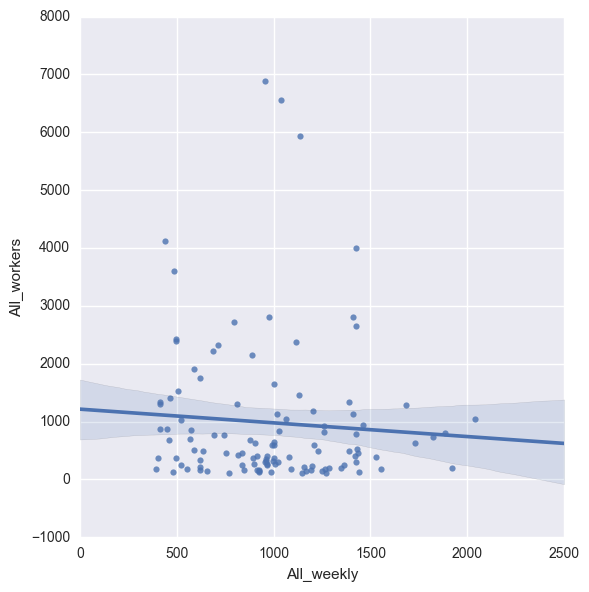

In [13]:
sns.lmplot('All_weekly','All_workers', data = student,size=6)

Зависимость количества работников обоих полов с их средней зарплатой

([<matplotlib.axis.XTick at 0xc36e9ccc50>,
 <a list of 3 Text xticklabel objects>)

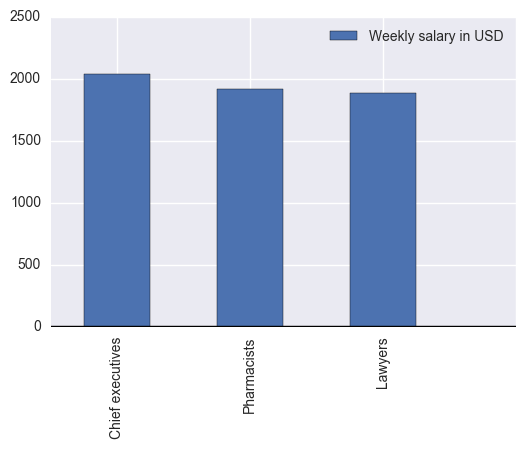

In [14]:
max2=0
b=list(map(int,student['All_weekly']))
c=list(map(str,student['Occupation']))
for i in range(112):
    if b[i]>max2:
        max2=b[i]
        t1=c[i]
max1=-4
for i in range(112):
    if b[i]>max1 and b[i]!=max2:
        max1=b[i]
        t2=c[i]
max3=-4
for i in range(112):
    if b[i]>max3 and b[i]!=max2 and b[i]!=max1:
        max3=b[i]
        t3=c[i]

s=[]
s.append(max2)
s.append(max1)
s.append(max3)
s1=[]
s1.append(t1)
s1.append(t2)
s1.append(t3)

df = DataFrame({'Occupation': s1 , 'Weekly salary in USD' : s})
plt.figure()
df.plot(kind='bar',)
plt.axhline(0, color='k')
plt.xticks([0,1,2,3], [t1, t2,t3])

Данная диаграмма показывает профессии, на которых средняя зарплата в неделю максимальная. Без учета пола.

#### Задание 2. пункт 1. Построение гистограммы распределения для 1 случайной величины.

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


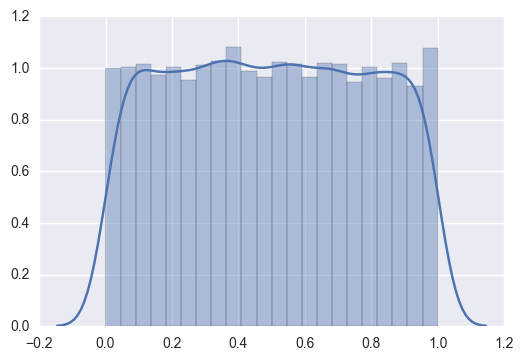

In [29]:
v=np.random.uniform(0,1,10000)
#plt.figure(figsize=(4, 3))
sns.distplot(v)

#### Задание 2.Пункт 1.Построение гистограммы для суммы трех случайных величин

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


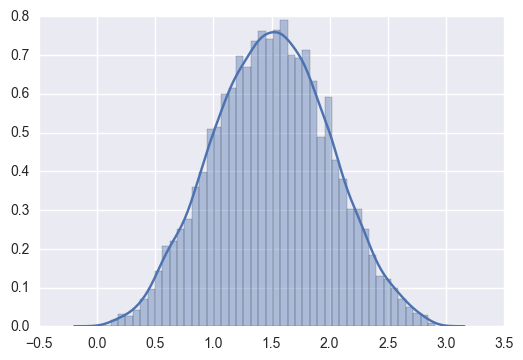

In [30]:
v=np.random.uniform(0,1,10000)
v1=np.random.uniform(0,1,10000)
v2=np.random.uniform(0,1,10000)
#plt.figure(figsize=(3.5, 3.5))
sns.distplot(v+v1+v2)

#### Построение гистограммы для суммы 10 случайных величин.

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


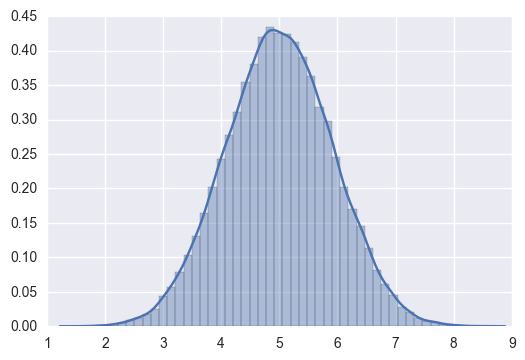

In [31]:
s=0
v=[]
for i in range(10):
    v.append(np.random.uniform(0,1,100000))
    s=s+v[i]
#plt.figure(figsize=(5, 3))
sns.distplot(s)

#### Гистограмма для суммы 50 случайных величин.

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


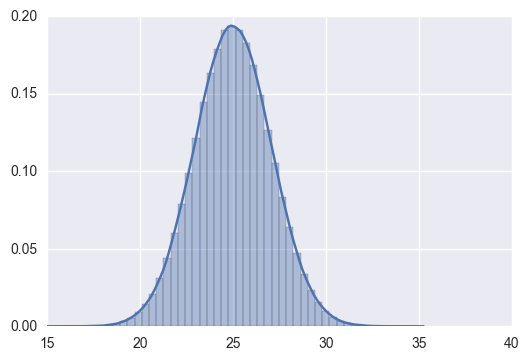

In [32]:
s=0
v=[]
for i in range(50):
    v.append(np.random.uniform(0,1,1000000))
    s=s+v[i]
#plt.figure(figsize=(5, 3))
sns.distplot(s)

#### 2 пункт 2 задачи.

Оценим вероятность. Сначала получим ее след. методом: выпишем функцию плотности для суммы 3 случайных величин и проинтегрируем ее, тем самым получим функцию распределения, а подставив 2, получим вероятность того,что сумма 3 величин меньше 2, значит, вычтем из 1 это число, и будет искомая вероятность. Где n=3, что соответствует количеству случайных величин в сумме.  
$f(x)=\frac{1}{(n-1)!}(x^{n-1})$ при $0<=х<=1$  
$f(x)=\frac{1}{(n-1)!}(x^{n-1}-C^{1}_{n}(x-1)^{n-1})$ при $1<=х<=2$

In [19]:
import sympy
x = sympy.symbols('x')
f1 = 0.5*x**2
f = 0.5*(-2*x**2+6*x-3)
i = sympy.integrate(f, (x, 1, 2))
j = sympy.integrate(f1, (x, 0, 1))
1-i-j

0.166666666666667

#### Найдем матожидание в 3 пункте.

3) $E(X_{1}^{5})$ :   $E(X^{5})=\int_{0}^{1} x^{5}f(x) dx$

In [20]:
x1=np.random.uniform(0,1,100000)
x2=x1**5
np.mean(x2)
#матожидание от х^5

0.16645521601153487

In [21]:
s=0
v=np.random.uniform(0,1,100000)
v1=v ** 5
for i in range(100000):
    s=s+v[i] ** 5
print(s/100000)

0.166882556486


#### Тот же пункт, только дисперсия

$Var(X_{1}/1+X_{2}^{2})=Var(X_{1}/1)+Var(X_{2}^{2})+2Cov(X_{1}, X_{2}^2)=Var(X_{1})+Var(X_{2}^{2})$, где величины Х1 и Х2 независимые, поэтому их ковариация=0

In [22]:
X1 = stats.uniform(0,1)
v1=X1.var()
v1

0.083333333333333329

In [23]:
v2=1/5-(1/3)**2
v2

0.0888888888888889

Тогда итоговое значение дисперсии:

In [24]:
v1+v2

0.17222222222222222

Если же там действительно ошибка в задании, и не проставлены скобки, тогда дисперсия будет: $Var(\frac{X_{1}}{1+X_{2}^{2}})$

In [25]:
x1=np.random.uniform(0,1,1000000)
x2=np.random.uniform(0,1,1000000)
s=0
s1=0
for i in range(1000000):
    s=s+(x1[i]/(x2[i] ** 2+1))**2
    s1=s1+(x1[i]/(x2[i]**2+1))
s1=s1/1000000
s=s/1000000
var=s-s1**2
var

0.060033762517505473

#### 4 пункт номера 2. Оценим 25%-ю квантиль.

In [26]:
x1=np.random.uniform(0,1,100000)
x2=np.random.uniform(0,1,100000)
for i in range(100000):
    x1[i]=x1[i]+1
    x2[i]=x2[i]+3
    x1[i]=x1[i]/x2[i]
k=np.percentile(x1, 25)
k

0.35723011547714967

#### 4 пункт 2 задания. Оценим медиану.

In [27]:
X1 = stats.uniform(0,1)
X2 = stats.uniform(0,1)
v1 = X1.rvs(10000000)
v2 = X2.rvs(10000000)
V = (v1+1)/(v2+3)
k=np.median(V)
k

0.42857138090238689

### Задача 3.
Имеется n ковбоев. Каждый из них может быть либо жив, либо мертв. Пусть  
Хi-случайная величина, которая может быть равна 1 или 0 в случае,если ковбой жив и  
убит соответственно. Тогда матожидание от выживших-это сумма матожиданий от  
каждой случайной величины Xi. Но раз они независимые и биномиально распределенные,  
тогда матожидания всех равны между собой. Поэтому итоговое матожидание равно  
$E(X)=nE(X_{i})$. Поэтому необходимо найти матожидание от одной случайной величины.  
Но раз мы знаем, что она распределена биномиально, тогда ее матожидание будет  
равно 0*P(от того,что случайно выбранный ковбой умрет)+1*P(от того,что  
случайно выбранный ковбой выживет).  
Вероятность того, что случайно выбранный ковбой выживет=1/2.  
Тогда итоговое матожидание=n/2.  
Можно еще сделать через матиндукцию. Для случая n=2 матожидание легко считается,  
и оно равно 1. Предположим, что у нас доказано для n-1, что матожидание равно $\frac{n-1}{2}$  
Далее скажем, что сейчас у нас есть n ковбоев. Тогда можем сказать, что всегда найдется тот,  
кто стреляет последним. Это значит, что из остальных никто в него не целился, либо тот,  кто  
целился, был убит. Более того, еще нам неважно, куда он целился. Тогда можно сказать,  
что все остальные n-1 целились только друг в друга. Здесь срабатывает наша предпосылка  
о матожидании для n-1 человек. Среди этих человек матожидание $\frac{n-1}{2}$.  
Также из предположения индукции мы знаем, что вероятность того, что ковбой выживает 1/2,  
а значит, мы(точнее, этот ковбой, который стреляет последний) целимся в живого человека  
с вероятностью 1/2. Тогда мы можем либо убить его, либо нет с равной вероятностью.  
Учитываем в нашем матожидании оба случая. Тогда, если мы его не убиваем, тогда  
остается $((n-1)/2)+1$ человек с вероятностью 1/2. Если же убиваем, тогда останется  
$(\frac{n-1}{2}) -1+1$. Здесь мы вычли того, кого убили, и добавили нас.  
Ответ: матожидание = $(\frac{n-1}{2}+1)*(1/2)+(\frac{n-1}{2})*(1/2)=(\frac{n+1}{4})+(\frac{n-1}{4})=\frac{n}{2}$

#### 2 пункт.   
Если же у нас ровно 1/3 ковбоев забыла свой кольт, тогда вероятность того,что случайно выбранный ковбой  
останется в живых повышается. То есть новая вероятность будет равна: $\frac{1}{2-х}$, где х-доля тех ковбоев,  
кто не взял с собой свой кольт. Значит, наша вероятность будет равна $\frac{3}{5}$. Также известно,  
что наши случайные величины соответствуют 0, если ковбой убит, и 1, если ковбой остался жив.  
Количество случайных величин совпадает с количеством ковбоев. Тогда искомое матожидание будет  
представлять собой сумму матожиданий от случайных величин (плюс известно,что они независимые,  
т.к. ковбой жив или мертв независимо от состояний других). 
Аналогично первому пункту, матожидание  
от случайной величины равно вероятности того, что случайно выбранный ковбой жив, умноженной на 1.  
Значит, наше матожидание от случайной величины равно $\frac{3}{5}$.  Тогда искомое и итоговое ожидание:  
Ответ:  
$E(X)=\frac{3}{5}n$